# Neural Networks!
In this example, we are going to make a basic neural network that trains the MNIST fashion dataset.

## Setup
There are two new imports here - Tensorflow and Keras.

Tensorflow - A Python library that helps with the development of machine learning algorithms.

Keras - A high-level neural networks API for Python

In [1]:
import tensorflow as tf
from tensorflow import keras as kr
import numpy as np
import matplotlib.pyplot as plt

These are the type of clothing that our model will predict.

In [2]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

## Loading the dataset
Instead of using Pandas to load a dataset and read a CSV file, Keras has a feature allowing the programmer to automatically download and use datasets. In this example, we are going to use Keras' fashion dataset (from MNIST).

In [78]:
mnist = kr.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Image visualization
A quick visualization function to see the grayscale values of an image.

In [34]:
def visualize_image(image):
    def num_digits(n):
        return len(str(n))

    for i in range(len(image)):
        for j in range(len(image[i])):
            pixel = image[i][j]
            num_digs = num_digits(pixel)

            if num_digs == 1:
                print(' ' + str(pixel) + ' ', end = ' ')

            elif num_digs == 2:
                print(' ' + str(pixel), end = ' ')

            elif num_digs == 3:
                print(pixel, end = ' ')

        print('\n')
    print('\n')
        
visualize_image(train_images[0])
visualize_image(train_images[50])

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   13  73  0   0   1   4   0   0   0   0   1   1   0  

 0   0   0   0   0   0   0   0   0   0   0   0   3   0   36 136 127  62  54  0   0   0   1   3   4   0   0   3  

 0   0   0   0   0   0   0   0   0   0   0   0   6   0  102 204 176 134 144 123  23  0   0   0   0   12  10  0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0  155 236 207 178 107 156 161 109  64  23  77 130  72  15 

 0   0   0   0   0   0   0   0   0   0   0   1   0   69 207 223 218 216 216 163 127 121 122 146 141  88 172  66 

 0   0   0   0   0   0   0   0   0   1   1   1   0  200 232 232 233 229 223 223 215 213 

## Getting the data ready
Each node in the neural network has a bias, which must be a number from 0 to 1. Right now, each pixel has a grayscale weight from 0 to 255. We need to convert the grayscale data from (0, 255) to (0, 1). We can do this by dividing by 255.

In [4]:
train_images = train_images / 255
test_images  = test_images  / 255

## The model
Now it is time to create the neural network. We will use Keras' Sequential network. `layers.Dense()` creates the different layers of the network, defining the shape of the network. In this example, our neural network has 3 layers:

the input layer (28x28 = 784 nodes)

1 hidden layer (128 nodes)

the output layer (10 nodes)

`tf.nn.relu` and `tf.nn.softmax` are differnt activation functions.

In [5]:
model = kr.Sequential([
    kr.layers.Flatten(
        input_shape = (28, 28)
    ),
    kr.layers.Dense(128, activation=tf.nn.relu),
    kr.layers.Dense(len(labels), activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


### More model configuration
We can configure the model a bit further by using the `compile()` method. We can set the optimizer, the loss function that we want to use, and what metrics we want to measure after the model trains.

Optimizer - An optimization algorithm helps to minimize (or maximize) and error function. In this case, we are using the Adam optimization algorithm.

Loss function - A loss function measures how good the model is at predicting output correctly. In this case, we are using sparse categorical crossentropy.

In [6]:
model.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
)

## Training the model
Now that the model has been created, we can train the neural network with our training data and training labels.

In [7]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4991 - acc: 0.8249
Epoch 2/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3777 - acc: 0.8636
Epoch 3/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3407 - acc: 0.8763
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3142 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2958 - acc: 0.8902


## Predicting
Now that the neural network has been trained, we can make some predictions about different types of clothing.

In [76]:
predictions = model.predict(test_images)

## Model visualization
Now that we have made predictions for the test data, lets write some functions to see the neural net's thinking.

This function, `plot_image()`, will plot an image on an x and y axis. It will show the correct label of the shirt, the model's guess, and the models' certainty.

In [9]:
def plot_image(i, prediction_vectors, true_labels, images):
    prediction_vector, true_label, image = prediction_vectors[i], true_labels[i], images[i]
    
    plt.grid(False)
    
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(image, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(prediction_vector)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel(
        'Guess: {} ({:2.0f} % certain)\nActual: {}'.format(
            labels[predicted_label],
            100 * np.max(prediction_vector),
            labels[true_label]
        )
    )

This function, `plot_value_array()`, will create a bar graph of the weights of each of the nodes on the output layer.

In [10]:
def plot_value_array(i, prediction_vectors, true_labels):
    prediction_vector, true_labels = prediction_vectors[i], true_labels[i]
    
    plt.grid(False)
    
    plot = plt.bar(
        range(len(labels)),
        prediction_vector,
        color = '#fa34ab'
    )
    
    plt.xlabel('Clothing type')
    plt.ylabel('Certainty')
    
    plt.xticks(
        range(len(labels)),
        labels,
        size='small',
        rotation=90
    )
    
    plt.ylim([0, 1])

    nums = []
    for num in np.arange(0, 120, 20):
        nums.append(str(num) + "%")

    plt.yticks(np.arange(0, 1.2, .2), nums, size='small')

    predicted_label = np.argmax(prediction_vector)
    
    plot[predicted_label].set_color('red')
    plot[true_labels].set_color('blue')

Now lets put these functions to the test and draw the images and bar graphs of some images in the dataset.

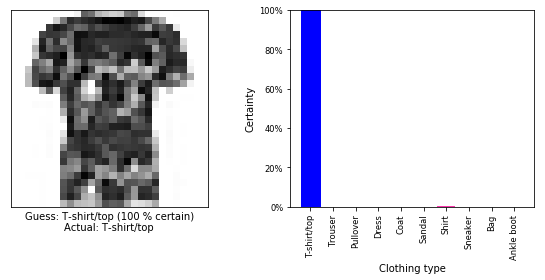

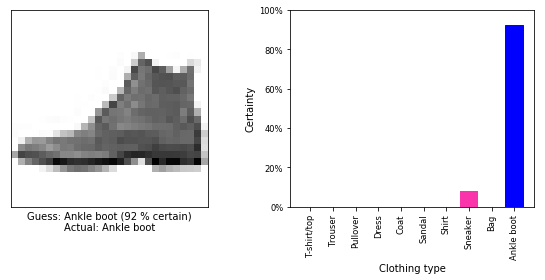

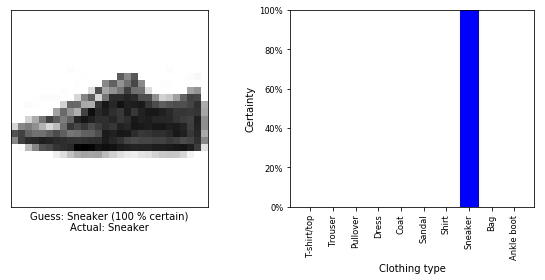

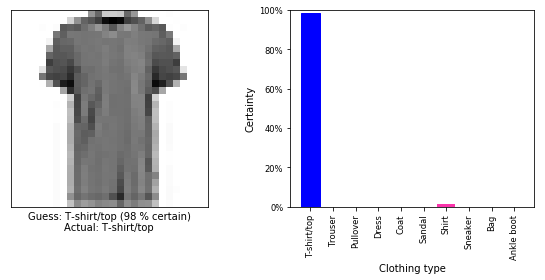

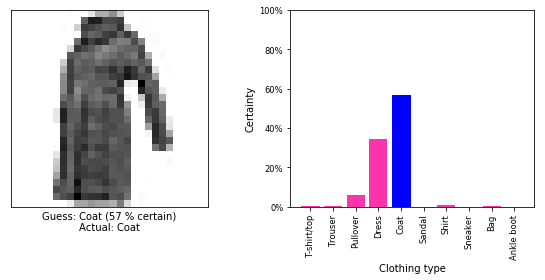

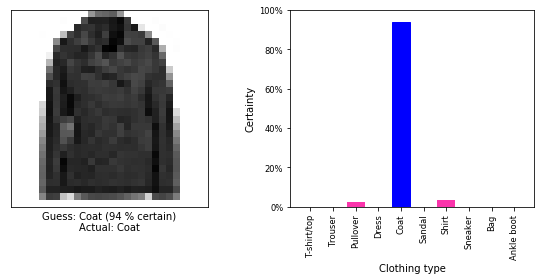

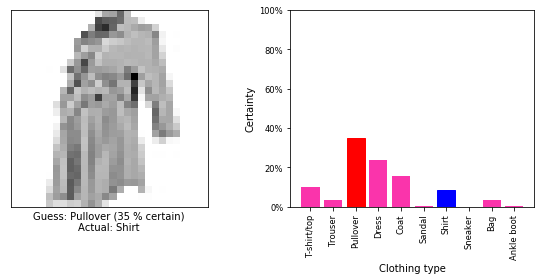

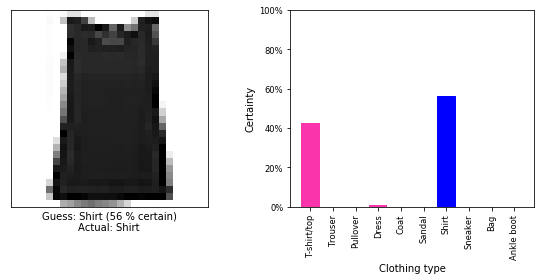

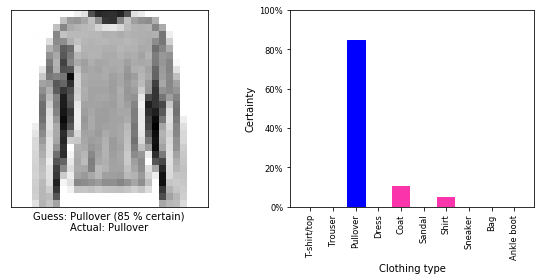

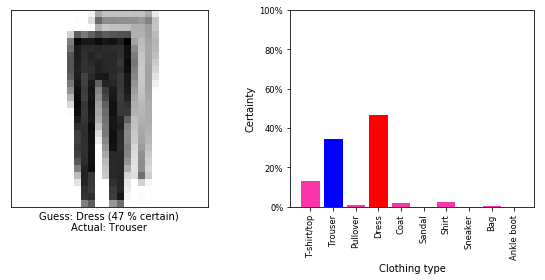

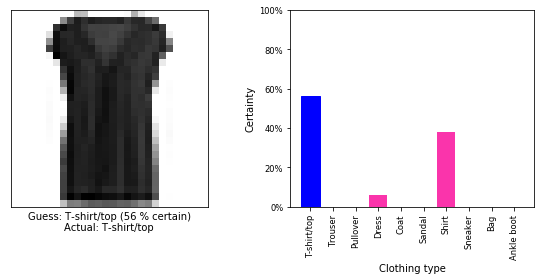

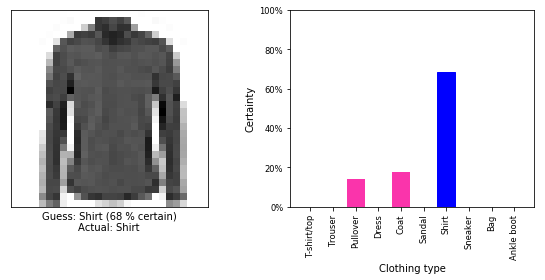

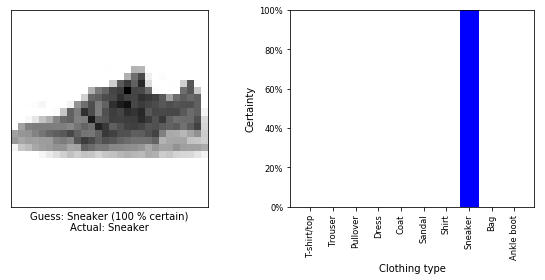

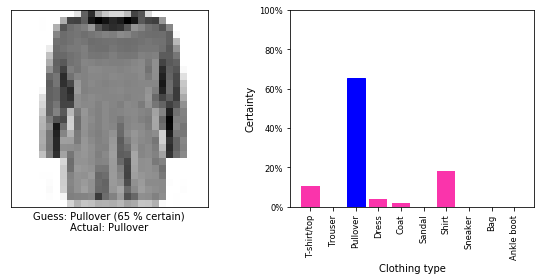

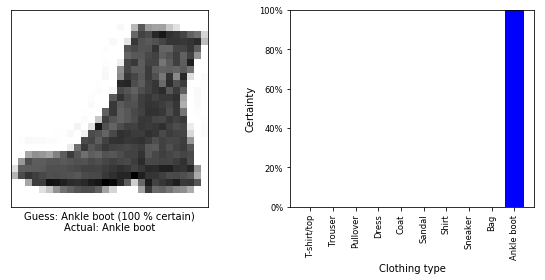

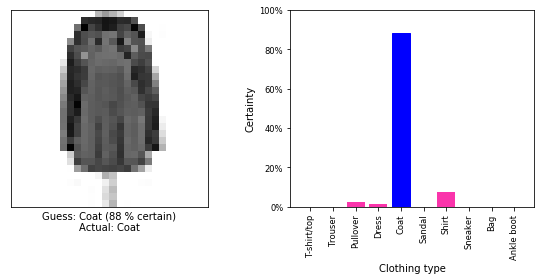

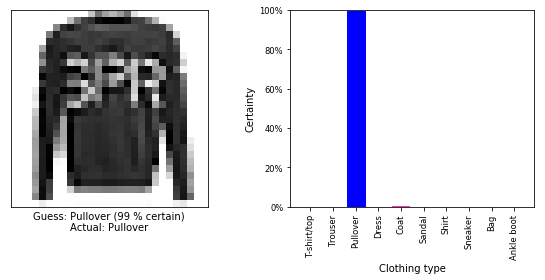

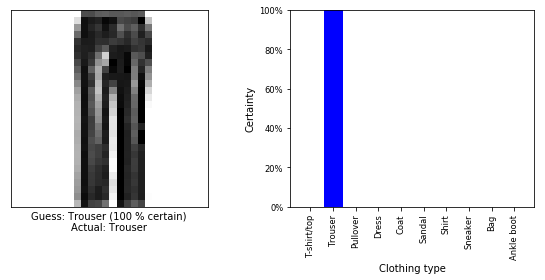

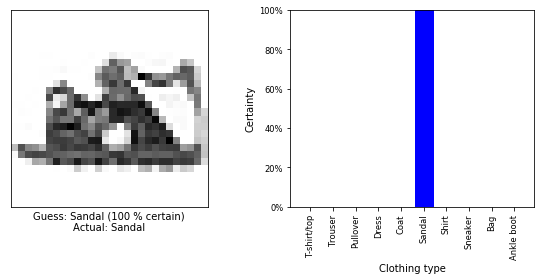

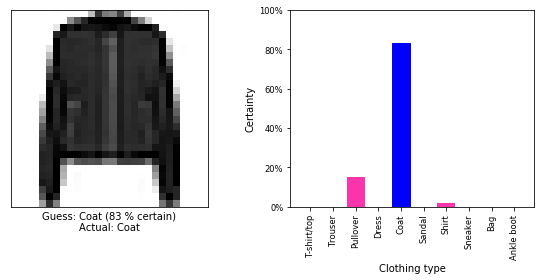

In [11]:
for i in range(400, 420):
    plt.figure(figsize = (8, 4))
    plt.subplot(1, 2, 1)

    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(1, 2, 2)

    plot_value_array(i, predictions, test_labels)

    plt.tight_layout()
    plt.show()

Pretty cool, huh?

## Analysis
We can analyze the accuracy of our model like so:

In [12]:
print("Accuracy: " + str(model.evaluate(test_images, test_labels))) 

10000/10000 [==============================] - 0s 21us/sample - loss: 0.3644 - acc: 0.8715
Accuracy: [0.36441933199167253, 0.8715]


## Using your own data
We can write some code to input your own data and have the model predict what type of clothing is in the iamge.

In [75]:
from PIL import Image

def flatten_image(path):
    img = Image.open(path).convert('F')
    WIDTH, HEIGHT = img.size

    data = list(img.getdata())
    data = [data[offset:offset + WIDTH] for offset in range(0, WIDTH * HEIGHT, WIDTH)]

    for i in range(len(data)):
        for j in range(len(data[i])):
            data[i][j] = int(255 - data[i][j])
    
    return data

custom_image = flatten_image('./data/sneaker2.jpg')

visualize_image(custom_image)

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

 0   0   5   0   0   4   0   0   0   2   88  19  1   0   2   0   3   0   0   0   0   4  

In [73]:
print(np.shape(custom_image))

custom_prediction = model.predict([[custom_image]])

print(custom_prediction)

(28, 28)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


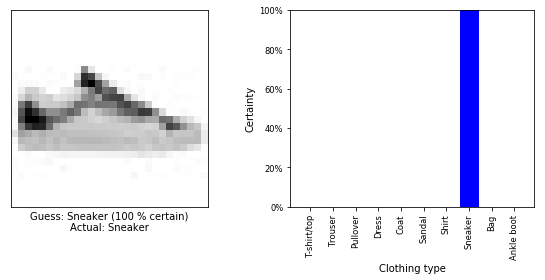

In [80]:
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)

plot_image(0, custom_prediction, [7], [custom_image])
plt.subplot(1, 2, 2)

plot_value_array(0, custom_prediction, [7])

plt.tight_layout()
plt.show()